## Logistic regression
---
I'm using [this](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset from UCI to try and predict whether a patient will develop diabetes. This is a binary classification tasks, with the target being either 0 (no diabetes) or 1 (onset of diabetes).

In [14]:
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualisation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, plot_confusion_matrix

In [3]:
diabetes_df = pd.read_csv('../data/diabetes-classification.csv')

diabetes_df.columns = [col.lower() for col in diabetes_df.columns]

First let's investigate our data. We have 7 predictive features and one target variable:
- pregnancies: number of pregnancies of the patient (they are all female)
- glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- bloodpressure: Diastolic blood pressure (mm Hg)
- skinthickness: the skin thickness in mm at the tricep fold, a proxy indicator for BMI/obesity
- insulin: 2-Hour serum insulin (mu U/ml)
- bmi: body mass index (weight in kg)/((height in metres)^2)
- age: age in years
- outcome: 0 or 1

In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


OK, much less correlated than in the other dataset, which means we have a shot at a good prediction here.

In [4]:
X = diabetes_df.drop('outcome', axis=1)
y = diabetes_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

Now let's train the model, then generate some predictions and evaluate.

newton-cg
-----------------


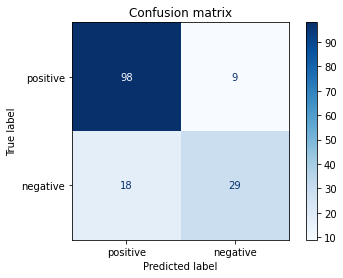

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
ROC AUC: 0.7664545635315172

lbfgs
-----------------


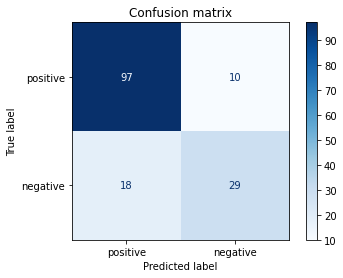

Accuracy: 0.8181818181818182
Precision: 0.7435897435897436
Recall: 0.6170212765957447
ROC AUC: 0.7617816663352556

liblinear
-----------------


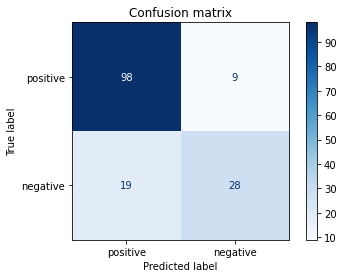

Accuracy: 0.8181818181818182
Precision: 0.7567567567567568
Recall: 0.5957446808510638
ROC AUC: 0.7558162656591767

sag
-----------------


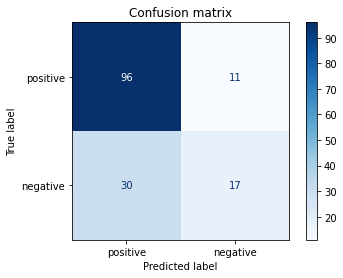

Accuracy: 0.7337662337662337
Precision: 0.6071428571428571
Recall: 0.3617021276595745
ROC AUC: 0.6294491946709087

saga
-----------------


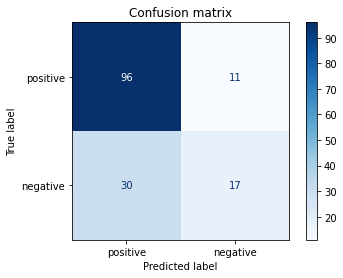

Accuracy: 0.7337662337662337
Precision: 0.6071428571428571
Recall: 0.3617021276595745
ROC AUC: 0.6294491946709087



In [21]:
def parameterise_model(solver):
    lreg = LogisticRegression(solver=solver, random_state=0,
                              C=0.8)
    lreg.fit(X_train, y_train)
    return lreg

for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    lreg = parameterise_model(solver)
    predictions_lreg = lreg.predict(X_test)
    print(solver)
    print("-----------------")
    disp = plot_confusion_matrix(lreg, X_test, y_test,
                                display_labels=['positive', 'negative'],
                                cmap=plt.cm.Blues,
                                values_format= '.0f')
    disp.ax_.set_title("Confusion matrix")
    plt.show()
    print("Accuracy: {}".format(accuracy_score(y_test, predictions_lreg)))
    print("Precision: {}".format(precision_score(y_test, predictions_lreg)))
    print("Recall: {}".format(recall_score(y_test, predictions_lreg)))
    print("ROC AUC: {}".format(roc_auc_score(y_test, predictions_lreg)))
    print()

In [25]:
98/(98+18)

0.8448275862068966

newton-cg and lbfgs stand out as the best performers, but not by far. Decreasing C, the inverse of the regularisation strength, results in worse performance across the board.